# Comparacion entre dustrack y arduair

## Library Import

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline
pd.options.mode.chained_assignment = None

# Definir funciones

In [11]:
def polyfitEq(x,y):
    C= np.polyfit(x,y,1)
    m=C[0]
    b=C[1]
    return 'y = x*{} + {}'.format(m,b)
def calibrate(x,y):
    C= np.polyfit(x,y,1)
    m=C[0]
    b=C[1]
    return x*m+b
def rename_labels(obj,unit):
    obj.columns=obj.columns.map(lambda x: x.replace('2',' stc_cdmb'))
    obj.columns=obj.columns.map(lambda x: x+' '+unit)
    return obj.columns

# Comparacion de datos

C:\Users\fega0\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


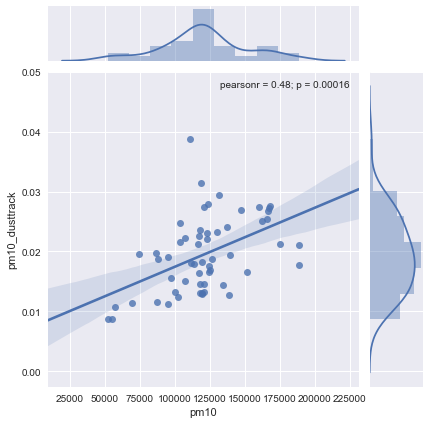

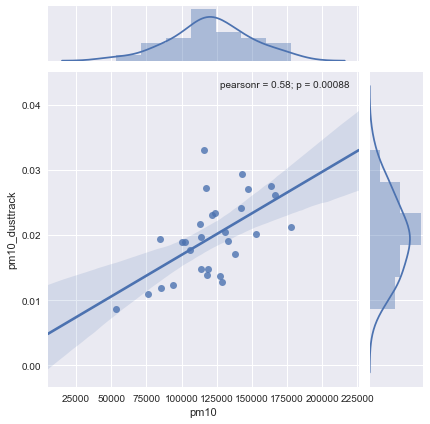

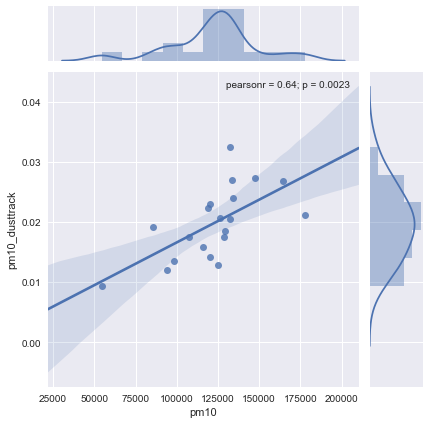

In [12]:
dataArd1=pd.read_csv('arduair_pm10_promedio_1h.csv').set_index('datetime')
dataArd2=pd.read_csv('arduair_pm10_promedio_2h.csv').set_index('datetime')
dataArd3=pd.read_csv('arduair_pm10_promedio_3h.csv').set_index('datetime')


dataEst1=pd.read_csv('dusttrack_pm10_promedio_1h.csv').set_index('datetime')
dataEst2=pd.read_csv('dusttrack_pm10_promedio_2h.csv').set_index('datetime')
dataEst3=pd.read_csv('dusttrack_pm10_promedio_3h.csv').set_index('datetime')

df1=pd.concat([dataArd1,dataEst1], join='inner', axis=1).reset_index()
df2=pd.concat([dataArd2,dataEst2], join='inner', axis=1).reset_index()
df3=pd.concat([dataArd3,dataEst3], join='inner', axis=1).reset_index()

sns.jointplot(data=df1,x='pm10',y='pm10_dusttrack', kind='reg')
sns.jointplot(data=df2,x='pm10',y='pm10_dusttrack', kind='reg')
sns.jointplot(data=df3,x='pm10',y='pm10_dusttrack', kind='reg')

In [13]:
print('')
print('Promedio 1h')
print(polyfitEq(df1['pm10'],df1['pm10_dusttrack']))
print('')
print('Promedio 2h')
print(polyfitEq(df2['pm10'],df2['pm10_dusttrack']))
print('')
print('Promedio 3h')
print(polyfitEq(df3['pm10'],df3['pm10_dusttrack']))


Promedio 1h
y = x*9.8375461868698e-08 + 0.007624784361144397

Promedio 2h
y = x*1.273386054252732e-07 + 0.0042227366779432575

Promedio 3h
y = x*1.4219421084150127e-07 + 0.0023909852287479


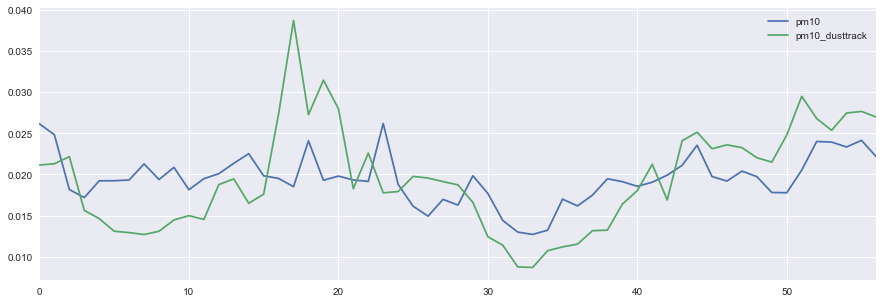

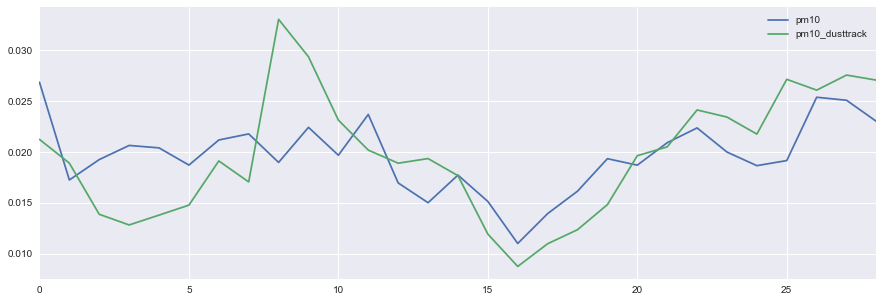

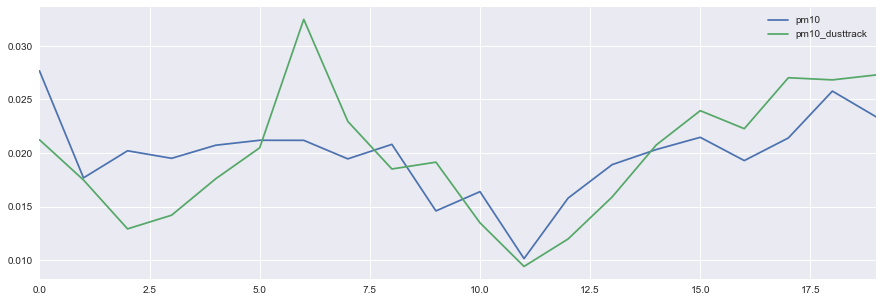

In [14]:
#GENERATE A CALIBRATE DATASETS
df1['pm10']=calibrate(df1['pm10'],df1['pm10_dusttrack'])
df1.plot(figsize=[15,5])

df2['pm10']=calibrate(df2['pm10'],df2['pm10_dusttrack'])
df2.plot(figsize=[15,5])

df3['pm10']=calibrate(df3['pm10'],df3['pm10_dusttrack'])
df3.plot(figsize=[15,5])

df1.columns=['datetime','PM10 prototipo [ug/m3]','PM10 dusttrak UPB [ug/m3]']
df2.columns=['datetime','PM10 prototipo [ug/m3]','PM10 dusttrak UPB [ug/m3]']
df3.columns=['datetime','PM10 prototipo [ug/m3]','PM10 dusttrak UPB [ug/m3]']

C:\Users\fega0\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


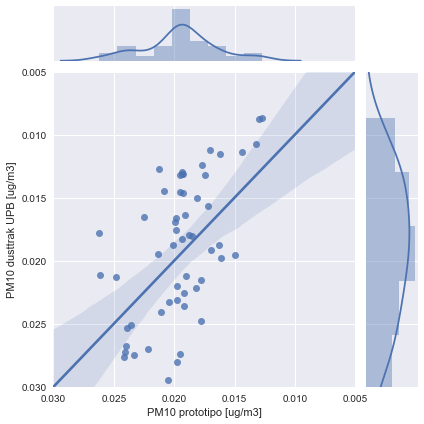

In [15]:
sns.jointplot(data=df1,x='PM10 prototipo [ug/m3]',y='PM10 dusttrak UPB [ug/m3]', kind='reg', stat_func=None,xlim={0.005,0.03},ylim={0.005,0.03})

C:\Users\fega0\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


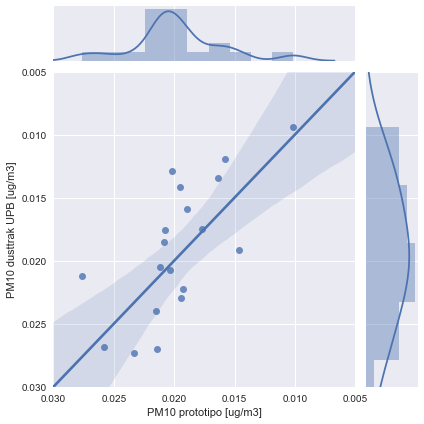

In [16]:
sns.jointplot(data=df3,x='PM10 prototipo [ug/m3]',y='PM10 dusttrak UPB [ug/m3]', kind='reg', stat_func=None,xlim={0.005,0.03},ylim={0.005,0.03})